# Raw data explorer
## The essential steps listed below lets user get accustomed to the data and its format:

In [1]:
import h5py                 # import h5py module required for opening matlab files
import numpy as np

In [2]:
# read in the file
matfile = h5py.File("SLAnalys.mat",'r')

In [3]:
# Access the root node of the data
Data = matfile['s']

## Get accustomed to some data internals

In [4]:
# Explore some data internal to the root node
Data['TMSArtifact']['arftRemv_trace']

<HDF5 dataset "arftRemv_trace": shape (405, 150), type "<f8">

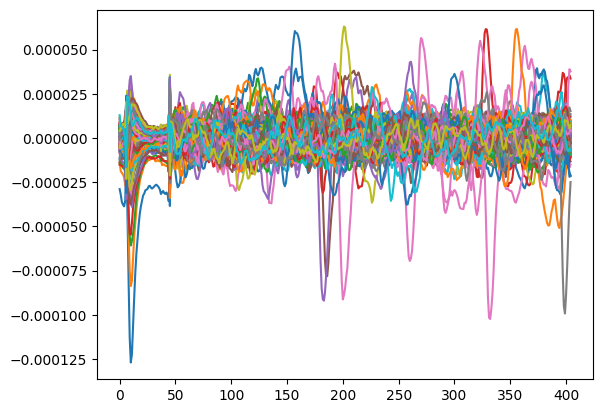

In [6]:
import matplotlib.pyplot as plt

# Plot the cleaned waveform around TMS pulse
plt.plot(Data['TMSArtifact']['arftRemv_trace']);

## Referencing data from permanent location

In [7]:
# Metadata gives information on data structure
Data['CombiMCD_fnames']

<HDF5 dataset "CombiMCD_fnames": shape (1, 3), type "|O">

In [8]:
# H
Data['CombiMCD_fnames'][...]

array([[<HDF5 object reference>, <HDF5 object reference>,
        <HDF5 object reference>]], dtype=object)

In [9]:
id(Data['CombiMCD_fnames'][...])

2603250549360

In [10]:
fnames = Data['CombiMCD_fnames'][...]
id(fnames)

2603250551184

In [158]:
fnames = Data['rawData'][...]

TypeError: Accessing a group is done with bytes or str,  not <class 'ellipsis'>

In [11]:
# watch the memory and load a large data as this one
analog = Data['rawData']['analog']

In [12]:
# another form for accessing data
Data['rawData/analog']

<HDF5 dataset "analog": shape (6, 1), type "|O">

In [13]:
matfile

<HDF5 file "SLAnalys.mat" (mode r)>

In [164]:
mylist = []
Data.visit(mylist.append)
mydict = {x:x for x in mylist}

In [14]:
import MATdata
import importlib
importlib.reload(MATdata)
hdf5 = h5py.File('SLAnalys.mat','r')


In [15]:
y = MATdata.MATdata(hdf5['s'])
y['SpikeModel/Y']

array([[ 17.41720498,  29.76651188,  26.29071742],
       [ 25.18738412,  18.95589251,   7.71261911],
       [  1.20002852,  -0.28282478,  15.46073634],
       ...,
       [ 27.02883892, -25.99225198,  25.69857441],
       [ 48.6970321 ,   5.56558603, -10.15574474],
       [ 28.3803756 , -14.46913637,  29.18680104]])

In [16]:
import numpy as np
y.slice = np.s_[:,0]

In [19]:
y['SpikeModel/Y']

array([[17.41720498,  0.        ,  0.        ],
       [25.18738412,  0.        ,  0.        ],
       [ 1.20002852,  0.        ,  0.        ],
       ...,
       [27.02883892,  0.        ,  0.        ],
       [48.6970321 ,  0.        ,  0.        ],
       [28.3803756 ,  0.        ,  0.        ]])

In [21]:
import MATfile
importlib.reload(MATfile)
matfile = MATfile.MATfile()
data = matfile.read()

Matlab file successfully read


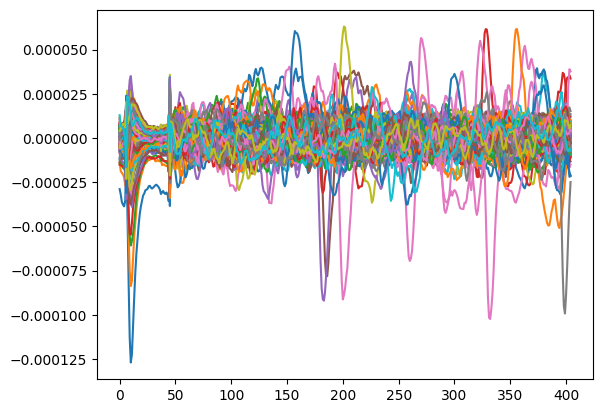

In [22]:
plt.plot(data['TMSArtifact/arftRemv_trace']);
plt.show()

In [24]:
data

MATdata<<HDF5 group "/s" (10 members)>>

In [25]:
y.btree

['CombiMCD_fnames',
 'EMGChan_id',
 'SpikeAmpTH',
 'SpikeChan_id',
 'SpikeModel/C',
 'SpikeModel/ClusterAssignment/data',
 'SpikeModel/ClusterTags/data',
 'SpikeModel/Cmu',
 'SpikeModel/ContaminationMatrix/data/n',
 'SpikeModel/ContaminationMatrix/data/pairwise',
 'SpikeModel/Features/data',
 'SpikeModel/Features/meta/Feature',
 'SpikeModel/Features/meta/num',
 'SpikeModel/GroupingAssignment/data',
 'SpikeModel/SpikeTimes/data',
 'SpikeModel/SpikeTimes/meta',
 'SpikeModel/Waveforms/data',
 'SpikeModel/Waveforms/meta/gain',
 'SpikeModel/Waveforms/meta/units',
 'SpikeModel/Y',
 'SpikeModel/dataSource/type',
 'SpikeModel/df',
 'SpikeModel/mu',
 'SpikeModel/mu_t',
 'SpikeModel/params/ClusterCost',
 'SpikeModel/params/CovRidge',
 'SpikeModel/params/DTmu',
 'SpikeModel/params/Df',
 'SpikeModel/params/DriftRate',
 'SpikeModel/params/MaxTestSpikes',
 'SpikeModel/params/MaxTrainSpikes',
 'SpikeModel/params/Seed',
 'SpikeModel/params/Tolerance',
 'SpikeModel/params/TrainFrac',
 'SpikeModel/param

In [26]:
data['TMSArtifact/ind']

array([[  428551.,   592571.,   756591., ..., 32546567., 32710587.,
        32874607.],
       [  428552.,   592572.,   756592., ..., 32546568., 32710588.,
        32874608.],
       [  428553.,   592573.,   756593., ..., 32546569., 32710589.,
        32874609.],
       ...,
       [  428953.,   592973.,   756993., ..., 32546969., 32710989.,
        32875009.],
       [  428954.,   592974.,   756994., ..., 32546970., 32710990.,
        32875010.],
       [  428955.,   592975.,   756995., ..., 32546971., 32710991.,
        32875011.]])